In [1]:
import pandas as pd 
import datetime as dt
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot, figure

C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
df = pd.read_csv("anaemia.csv")


In [4]:
countries = df["Country_name"].unique()

In [5]:
# list of top 30 countries by population (worldometer.com)
top_30_countries = [
    "China",
    "India",
    "United States of America",
    "Indonesia",
    "Pakistan",
    "Brazil",
    "Nigeria",
    "Bangladesh",
    "Russian Federation",
    "Mexico",
    "Japan",
    "Ethiopia",
    "Philippines",
    "Egypt",
    "Viet Nam",
    "Democratic Republic of the Congo",
    "Iran (Islamic Republic of)",
    "Germany",
    "Thailand",
    "United Kingdom of Great Britain and Northern Ireland",
    "France",
    "Italy",
    "United Republic of Tanzania",
    "South Africa",
    "Myanmar",
    "Kenya",
    "Republic of Korea",
    "Colombia",
    "Spain"
]

In [6]:
####### LOOP THROUGH EACH COUNTRY WITH THE ARIMA MODEL AND APPEND THE FORECAST DATA TO A NEW DF ###########

In [7]:
test_appended_df = pd.DataFrame()

In [ ]:

for i in top_30_countries:
    print(i)
    country_input = i
    single_country_df = df[df["Country_name"] == i]
    single_country_df_clean = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
    country_df = single_country_df_clean.reset_index(drop=True)
    country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
    country_df.set_index("Year", inplace=True)
    country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]
    model = ARIMA(country_df_for_model, order=(5,1,0))
    model_fit = model.fit()
    forecast_df = model_fit.get_forecast(5, alpha=0.05).summary_frame()
    forecast_df["Country_name"] = country_input
    future_df = pd.concat([country_df,forecast_df])
    test_appended_df = pd.concat([test_appended_df,future_df])



In [9]:
test_appended_df

,Anaemia_Num(Thousands),Country_name,mean,mean_se,mean_ci_lower,mean_ci_upper
2000-01-01,79563.801,China,NaN,NaN,NaN,NaN
2001-01-01,76520.032,China,NaN,NaN,NaN,NaN
2002-01-01,74488.868,China,NaN,NaN,NaN,NaN
2003-01-01,72780.049,China,NaN,NaN,NaN,NaN
2004-01-01,71106.276,China,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-01-01,NaN,Spain,1411.570668,3.810457,1404.102311,1419.039026
2021-01-01,NaN,Spain,1430.134329,10.624064,1409.311545,1450.957112
2022-01-01,NaN,Spain,1446.530020,18.511757,1410.247643,1482.812397
2023-01-01,NaN,Spain,1461.621132,27.607978,1407.510491,1515.731774


In [10]:
test_appended_df.to_csv("anaemia_forecast.csv")

#########################################################################################################

# This was the test for one country input

In [704]:
########################### CHOOSE COUNTRY ##########################
# country_input = "Italy"
# single_country_df = df[df["Country_name"] == country_input]
# single_country_df = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
# country_df = single_country_df.reset_index(drop=True)
# country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
# country_df.set_index("Year", inplace=True)
# country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]

#### FORECAST MODEL: ARIMA

In [706]:
# model = ARIMA(country_df_for_model, order=(5,1,0))
# model_fit = model.fit()
# forecast_df = model_fit.get_forecast(5, alpha=0.05).summary_frame()
# # print(model_fit.summary())
# future_df = pd.concat([country_df,forecast_df])

C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


#### Plot model

Text(0.5, 1.0, 'Anaemic women in Italy')

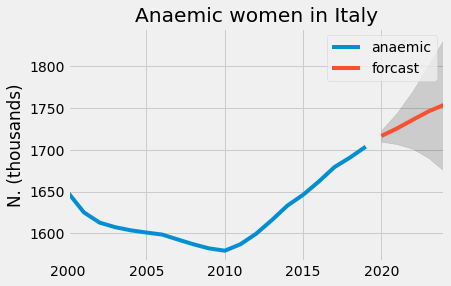

In [707]:
# #import seaborn as sns
# future_df[["Anaemia_Num(Thousands)","mean"]].plot()
# plt.style.use('fivethirtyeight')
# plt.fill_between(future_df.index, future_df["mean_ci_lower"],future_df["mean_ci_upper"], color='k',alpha=.15)
# plt.legend(['anaemic','forcast'])
# plt.ylabel('N. (thousands)')
# plt.title(f'Anaemic women in {country_input}')